#**Titanic Survival Prediction Project**

**This works is a machine learning classification task that predicts the survival of passengers on the Titanic. It utilizes a Random Forest Classifier model to determine the likelihood of a passenger surviving the ship's sinking. The dataset used for this project contains various features such as age, sex, class, and more.**

**Data Preprocessing**: Clean, handle missing values, and perform feature engineering for model suitability.

**Exploratory Data Analysis (EDA)**: Gain insights into data, understand feature distribution.

**Model Training**: Train a Random Forest Classifier for survival predictions.

**Feature Importance:** Analyze and identify influential features on survival predictions.

**Evaluation:** Assess model performance using cross-validation with various metrics.

**Conclusion:** Summarize findings, noting age, sex, and Pclass as significant factors for survival.


In [83]:
!pip install pyforest

In [84]:
import warnings
warnings.filterwarnings('ignore')
import pyforest

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [85]:
titanic_test=pd.read_csv('/content/test.csv')
titanic_train=pd.read_csv('/content/train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
titanic_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

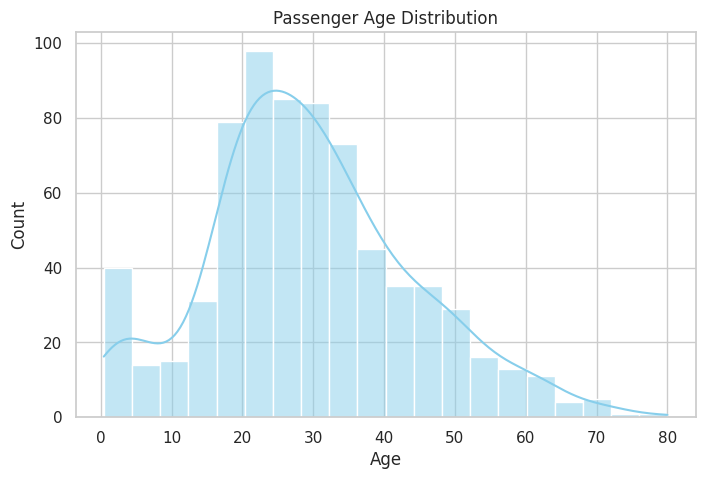

In [90]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_train['Age'], bins=20, kde=True, color='skyblue')
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

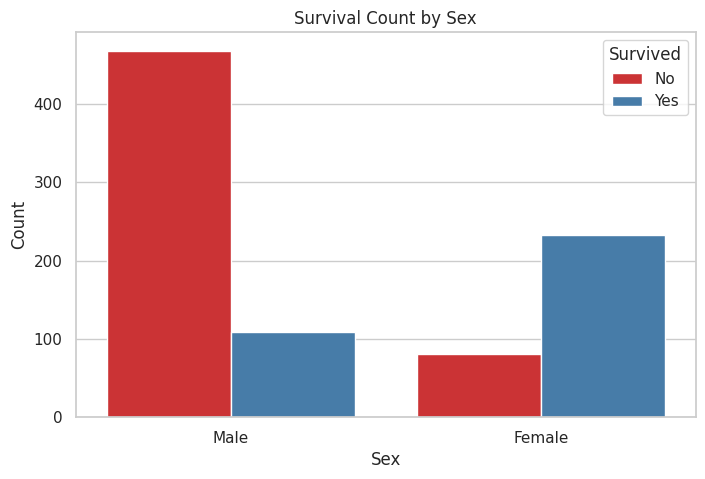

In [91]:
# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_train, x="Sex", hue="Survived", palette="Set1")
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

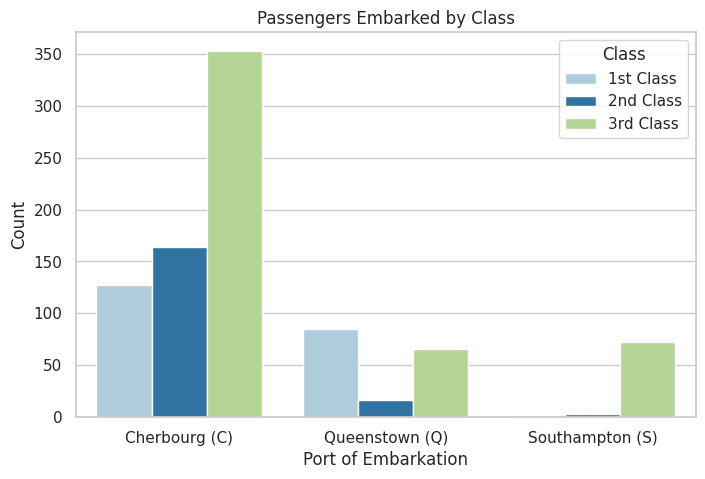

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_train, x="Embarked", hue="Pclass", palette="Paired")
plt.title("Passengers Embarked by Class")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Cherbourg (C)", "Queenstown (Q)", "Southampton (S)"])
plt.legend(title="Class", labels=["1st Class", "2nd Class", "3rd Class"])

# Show the plot
plt.show()

In [93]:
titanic_train = titanic_train.drop(['PassengerId'], axis=1)

In [94]:

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
titanic_train = titanic_train.drop(['Cabin'], axis=1)
titanic_test = titanic_test.drop(['Cabin'], axis=1)

In [95]:
data = [titanic_train, titanic_test]

for dataset in data:
    mean = titanic_train["Age"].mean()
    std = titanic_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic_train["Age"].astype(int)
titanic_train["Age"].isnull().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0

In [96]:
common_value = 'S'
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [97]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [98]:
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [99]:
genders = {"male": 0, "female": 1}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [100]:


data = [titanic_train, titanic_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

titanic_train['Age'].value_counts()

4    162
6    160
5    145
3    140
2    121
1     95
0     68
Name: Age, dtype: int64

In [101]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [102]:
titanic_train = titanic_train.drop(['Name'], axis=1)
titanic_test= titanic_test.drop(['Name'], axis=1)


In [103]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,0,2,1,0,A/5 21171,7,0,8
1,1,1,1,5,1,0,PC 17599,71,1,3
2,1,3,1,3,0,0,STON/O2. 3101282,7,0,8
3,1,1,1,5,1,0,113803,53,0,3
4,0,3,0,5,0,0,373450,8,0,8


In [104]:
titanic_train = titanic_train.drop(['Ticket'], axis=1)
titanic_test= titanic_test.drop(['Ticket'], axis=1)

In [105]:
data = [titanic_train, titanic_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [106]:
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [107]:
# Building Machine Learning Models
X_train = titanic_train.drop(["Survived"], axis=1)
Y_train = titanic_train["Survived"]
X_test = titanic_test.drop("PassengerId", axis=1)

In [108]:
titanic_train  = titanic_train.drop("Parch", axis=1)
titanic_test  = titanic_test.drop("Parch", axis=1)

In [109]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [110]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.72222222 0.79775281 0.75280899 0.80898876 0.85393258 0.84269663
 0.79775281 0.78651685 0.84269663 0.84269663]
Mean: 0.8048064918851436
Standard Deviation: 0.04086046199139222


In [111]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,importance
feature,
Sex,0.312
Fare,0.113
Age_Class,0.110
Deck,0.094
Pclass,0.086
SibSp,0.085
Age,0.082
Embarked,0.064
Parch,0.053


<Axes: xlabel='feature'>

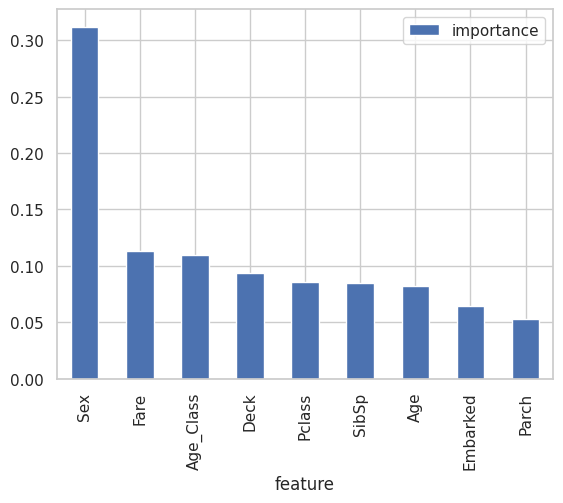

In [112]:
importances.plot.bar()

**For best paramenter for Hyperparametes it's take long time**

In [113]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# # Set up TPU parallel processing
# import multiprocessing
# n_cores = multiprocessing.cpu_count()
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=n_cores)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=n_cores)
# clf.fit(X_train, Y_train)
# best_params = clf.best_params
# print(best_params)

In [114]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1,
                                       min_samples_split = 10,
                                       n_estimators=100,
                                       max_features='auto',
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score, 4)*100, "%")

oob score: 100 %


In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[488,  61],
       [107, 235]])

In [116]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.793918918918919
Recall: 0.6871345029239766


In [117]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7366771159874609

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

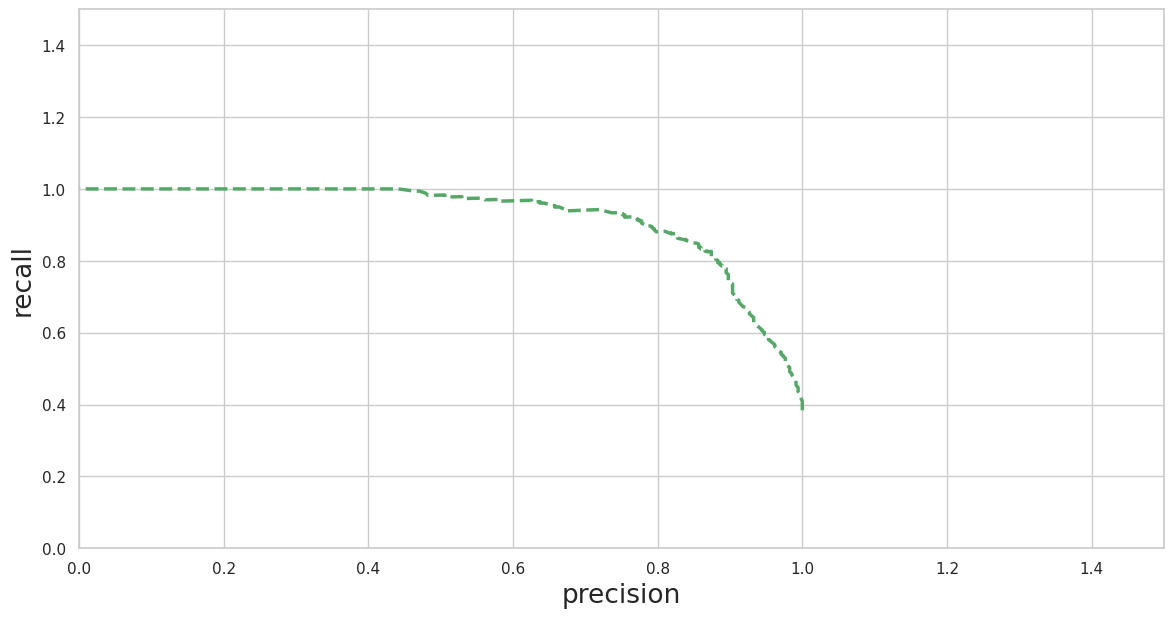

In [118]:
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

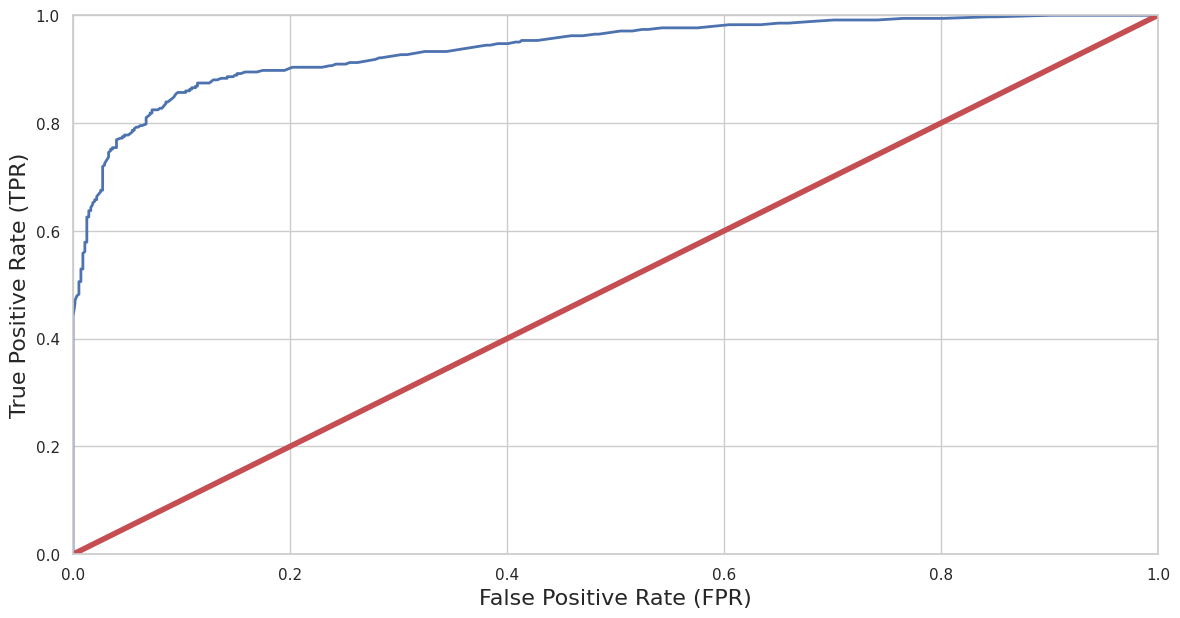

In [119]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [120]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9383861140404137
